In [1]:
import numpy as np

#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
#from my_plot import set_size

import taxgermany as tg

/home/kheidemann/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
params = {
    #'backend': 'ps',
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': True,
    'axes.linewidth': 1,
    'figure.figsize': (2*128./72.27, 2*100./72.27),
    'axes.titlesize': 14,
}
plt.rcParams.update(params)

In [3]:
alpha = 5
B=np.linspace(1,3e5,1000)

/tmp/ipykernel_131447/2020921315.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


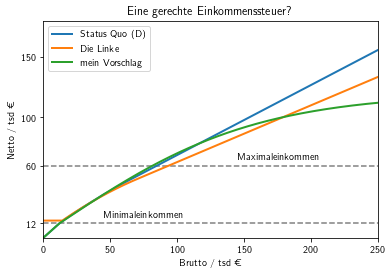

In [8]:
plt.hlines(60,0,250, ls="--", color="gray")
plt.hlines(12,0,250, ls="--", color="gray")


plt.plot(B/1000, tg.netto_ger_vectorized(B)/1000,label=r"Status Quo (D)", lw=2)
plt.plot(B/1000, tg.netto_linke_vectorized(B)/1000,label=r"Die Linke", lw=2)
plt.plot(B/1000, tg.netto_vectorized(B,12.2,10)/1000,label=r"mein Vorschlag", lw=2)


#plt.plot(12*B, 12*B, label="brutto=netto")
#plt.plot(12* B, 12*tax_vectorized(B), label="tax")
#plt.yscale("log")
plt.ylim(0,180)
plt.xlim(0,250)
#plt.ylabel("jährliches Nettoeinkommen in tsd €")
#plt.xlabel("jährliches Bruttoeinkommen in tsd €")
plt.ylabel("Netto / tsd €")
plt.xlabel("Brutto / tsd €")
plt.yticks([12,60,100,150])

plt.text(145,65,"Maximaleinkommen")
plt.text(45,17,"Minimaleinkommen")

plt.title("Eine gerechte Einkommenssteuer?")


#plt.grid()
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.legend()
#plt.savefig("./fig/netto-brutto-vgl.svg", bbox_inches='tight', dpi=300)

### Vary $\alpha$

In [18]:
ALPHA = [5, 10, 20]

(10000.0, 70000.0)

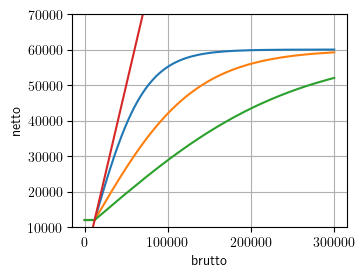

In [19]:
for a in ALPHA:
    plt.plot(B, netto_vectorized(B, a, 5))
    plt.xlabel("brutto")
    plt.ylabel("netto")
    plt.grid(True)
plt.plot(B, B)
plt.ylim([10000,70000])

<>:8: SyntaxWarning: invalid escape sequence '\%'
<>:8: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_416933/4137313002.py:8: SyntaxWarning: invalid escape sequence '\%'
  plt.ylabel("Steuersatz in \%")
/tmp/ipykernel_416933/4137313002.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in current_values])
/tmp/ipykernel_416933/4137313002.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values]);


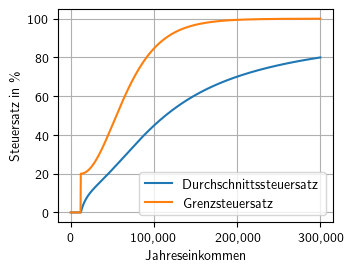

In [20]:
plt.plot(B, tax_rate_vectorized(B), label="Durchschnittssteuersatz")
plt.plot(B, grenzsteuersatz_vectorized(B), label="Grenzsteuersatz")
#plt.plot(B[1:], grenzsteuersatz_num_diff, label="Grenzsteuersatz numerisch")

plt.legend()
plt.grid()
plt.xlabel("Jahreseinkommen")
plt.ylabel("Steuersatz in \%")

current_values = plt.gca().get_yticks();
plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in current_values])
current_values = plt.gca().get_xticks();
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values]);

#plt.yscale("log")
#plt.xlim(1000,1e4)
#plt.ylim(5e-2,1)

/tmp/ipykernel_391906/1143056931.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['{:,.0f}'.format(x) for x in current_values]);
/tmp/ipykernel_391906/1143056931.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0%}'.format(x) for x in current_values]);
/tmp/ipykernel_391906/1143056931.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['{:,.0f}'.format(x) for x in current_values]);


Text(0.05, 0.85, '(b)')

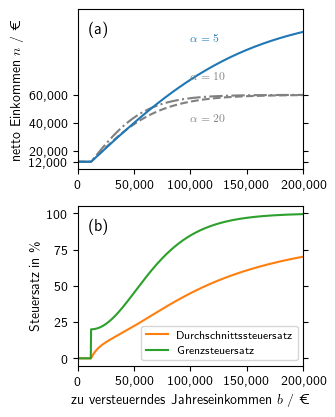

: 

In [ ]:
width = 500
size = set_size(width, subplots=(2, 1))
fig, [ax1,ax2] = plt.subplots(2, 1, figsize=(0.5*size[0], size[1]), sharex=False)

ax1.plot(B, netto_vectorized(B, alpha=5, k=5), "--", c="gray")
ax1.plot(B, netto_vectorized(B, alpha=4, k=5), "-.", c="gray")
ax1.plot(B, netto_vectorized(B, alpha=12, k=10))

#ax1.grid()
#ax2.grid()

ax1.set_xlim(0, 200000)
#ax1.set_ylim(0, 200000)

#ax1.set_title(r"$n = 1.000 \left[1+4 \tanh \left(\frac{b - 1.000}{5 \cdot 1.000} \right) \right]$")

ax1.set_yticks([12e3,20e3,40e3,60e3])
current_values = ax1.get_yticks();
ax1.set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);
current_values = ax1.get_xticks();
ax1.set_xticklabels(['{:,.0f}'.format(x) for x in current_values]);
#ax1.legend()
#ax1.set_yticklabels((10000,20000))

#ax1.set_xlabel(r"Jahreseinkommen $b$")
ax1.set_ylabel(r"netto Einkommen $n$ / \texteuro%1.0fB") 
ax1.text(0.05,0.85,r"(a)", transform=ax1.transAxes, fontsize=12, color="black")

ax2.plot(B, tax_rate_vectorized(B), label="Durchschnittssteuersatz", c="tab:orange")
ax2.plot(B, grenzsteuersatz_vectorized(B), label="Grenzsteuersatz", c="tab:green")

ax2.set_xlim(0, 200000)

#ax1.set_title("Steuertarif für ein Maximaleinkommen")

current_values = ax2.get_yticks();
ax2.set_yticklabels(['{:,.0%}'.format(x) for x in current_values]);
current_values = plt.gca().get_xticks();
ax2.set_xticklabels(['{:,.0f}'.format(x) for x in current_values]);

ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')

ax2.legend(fontsize=8)

ax2.set_xlabel(r"zu versteuerndes Jahreseinkommen $b$ / \texteuro%1.0fB")
ax2.set_ylabel("Steuersatz in \%")

fig.tight_layout()

ax1.text(0.5,0.8,r"$\alpha=5$", transform=ax1.transAxes, fontsize=8, color="tab:blue")
ax1.text(0.5,0.3,r"$\alpha=20$", transform=ax1.transAxes, fontsize=8, color="gray")
ax1.text(0.5,0.56,r"$\alpha=10$", transform=ax1.transAxes, fontsize=8, color="gray")


ax2.text(0.05,0.85,r"(b)", transform=ax2.transAxes, fontsize=12, color="black")

#plt.savefig("./fig/steuerreform.png",bbox_inches='tight', dpi=300)

/tmp/ipykernel_960807/654294960.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);
/tmp/ipykernel_960807/654294960.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['{:,.0f}'.format(x) for x in current_values]);
/tmp/ipykernel_960807/654294960.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_yticklabels(['{:,.0%}'.format(x) for x in current_values]);


Text(0, 0.5, 'Steuersatz in \\%')

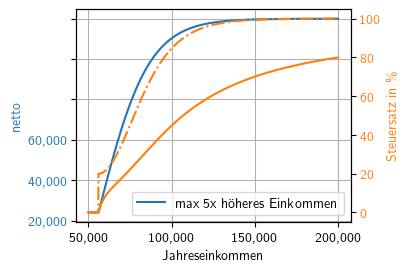

: 

In [ ]:
width = 500
#size = set_size(width, subplots=(1, 2))
fig, ax3 = plt.subplots()

color = "tab:blue"

ax3.plot(B, netto_vectorized(B),label="max 5x höheres Einkommen", c=color)

ax3.grid()

current_values = ax1.get_yticks();
ax3.set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);
current_values = ax1.get_xticks();
ax3.set_xticklabels(['{:,.0f}'.format(x) for x in current_values]);
ax3.legend()

ax3.set_xlabel("Jahreseinkommen")
ax3.set_ylabel("netto", c=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

color="tab:orange"

ax4.plot(B, tax_rate_vectorized(B), label="Durchschnittssteuersatz",c=color)
ax4.plot(B, grenzsteuersatz_vectorized(B), "-.", label="Grenzsteuersatz", c=color)

current_values = ax4.get_yticks();
ax4.set_yticklabels(['{:,.0%}'.format(x) for x in current_values]);

ax4.tick_params(axis='y', labelcolor=color)
ax4.set_ylabel("Steuersatz in \%", c=color)

## aktueller Einkommenssteuertarif Deutschland

/tmp/ipykernel_133981/1896063174.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
/tmp/ipykernel_133981/1896063174.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


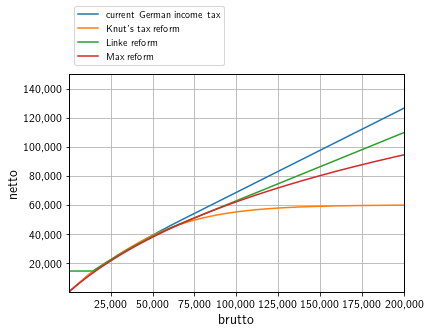

In [6]:
B_big=np.linspace(1,5e5,1000)
plt.plot(B_big, tg.netto_ger_vectorized(B_big),label="current German income tax")
plt.plot(B_big, tg.netto_vectorized(B_big),label="Knut's tax reform")
plt.plot(B_big, tg.netto_linke_vectorized(B_big),label="Linke reform")
plt.plot(B_big, tg.netto_max_vectorized(B_big, 7e4, 15e3, 11e3),label="Max reform")

#plt.plot(12*B, 12*B, label="brutto=netto")
#plt.plot(12* B, 12*tax_vectorized(B), label="tax")
#plt.yscale("log")
plt.ylim(100,150000)
plt.xlim(100,200000)
plt.ylabel("netto")
plt.xlabel("brutto")
plt.grid()
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.legend(bbox_to_anchor=(0,1.02, 1,0.2), loc="lower left")
#plt.savefig("./fig/brutto-netto-linke-current-knut.png",bbox_inches='tight', dpi=300)

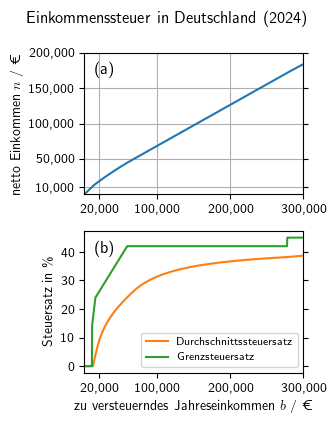

: 

In [ ]:
width = 500
size = set_size(width, subplots=(2, 1))
fig, [ax1,ax2] = plt.subplots(2, 1, figsize=(0.5*size[0], size[1]), sharex=False)

plt.suptitle("Einkommenssteuer in Deutschland (2024)")

ax1.plot(B, tg.netto_ger_vectorized(B))
#ax1.plot(B, netto_vectorized(B, alpha=20), "-.", c="gray")
#ax1.plot(B, netto_vectorized(B, alpha=5))

#ax1.grid()
#ax2.grid()

ax1.set_xlim(0, 300000)
ax1.set_ylim(0, 200000)

#ax1.set_title(r"$n = 1.000 \left[1+4 \tanh \left(\frac{b - 1.000}{5 \cdot 1.000} \right) \right]$")

ax1.set_yticks([10e3,50e3,100e3,150e3, 200e3])
ax1.set_xticks([20e3,100e3,200e3,300e3])
ax2.set_xticks([20e3,100e3,200e3,300e3])

current_values = ax1.get_yticks();
ax1.yaxis.set_major_locator(mticker.FixedLocator(current_values))
ax1.set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);
current_values = ax1.get_xticks();
ax1.xaxis.set_major_locator(mticker.FixedLocator(current_values))
ax1.set_xticklabels(['{:,.0f}'.format(x) for x in current_values]);
#ax1.legend()
#ax1.set_yticklabels((10000,20000))

ax1.grid()

#ax1.set_xlabel(r"Jahreseinkommen $b$")
ax1.set_ylabel(r"netto Einkommen $n$ / \texteuro%1.0fB") 
ax1.text(0.05,0.85,r"(a)", transform=ax1.transAxes, fontsize=12, color="black")

ax2.plot(B, tg.tax_ger_vectorized(B)/B, label="Durchschnittssteuersatz", c="tab:orange")
ax2.plot(B, tg.grenz_ger_vectorized(B), '-', label="Grenzsteuersatz", c="tab:green")
#ax2.scatter(B, tg.grenz_ger_vectorized(B), c="tab:green")

#ax2.axvline(x=11604, c = "gray")

ax2.set_xlim(0, 300000)

#ax1.set_title("Steuertarif für ein Maximaleinkommen")

current_values = ax2.get_yticks();
ax2.yaxis.set_major_locator(mticker.FixedLocator(current_values))
ax2.set_yticklabels(['{:,.0%}'.format(x) for x in current_values]);
current_values = plt.gca().get_xticks();
ax2.xaxis.set_major_locator(mticker.FixedLocator(current_values))
ax2.set_xticklabels(['{:,.0f}'.format(x) for x in current_values]);

ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')

ax2.legend(fontsize=8)

ax2.set_xlabel(r"zu versteuerndes Jahreseinkommen $b$ / \texteuro%1.0fB")
ax2.set_ylabel("Steuersatz in \%")

fig.tight_layout()

ax2.text(0.05,0.85,r"(b)", transform=ax2.transAxes, fontsize=12, color="black")

plt.savefig("./fig/status-quo.png",bbox_inches='tight', dpi=300)

## income  distribution Germany

In [4]:
import pandas as pd

In [5]:
B_frame = pd.read_csv('/home/kheidemann/ownCloud/projects/tax-reform/data/verteilung-bruttomonatsverdienste-vollzeitbeschaeftigung-cleansed.csv', sep=',')
B_frame_norich = B_frame.drop([61])
B_frame_norich.Mittelwert *= 12 # yearly income not monthly
B_frame.Mittelwert *= 12 # yearly income not monthly
B_frame_norich.Anteil *= 0.01 # weights initially in %
B_frame.Anteil *= 0.01

In [6]:
# estimate avg. income of rich (>12.100€ per month); not given in the original data
N_cat = len(B_frame)
Weights_norich = np.array(B_frame_norich['Anteil'])
Weights = np.array(B_frame['Anteil'])
#print(np.sum(Weights))
avg_income_ger = 4323*12 # yearly avg. income given on the destatis website
income_rich = (avg_income_ger - np.dot(B_frame_norich['Mittelwert'], Weights_norich))/Weights[-1]
print(income_rich) # monthly income of rich

208298.63013698603


In [8]:
B_frame.loc[N_cat-1, 'Mittelwert'] = income_rich
B_frame.tail()

/tmp/ipykernel_667865/1789006718.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '208298.63013698603' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  B_frame.loc[N_cat-1, 'Mittelwert'] = income_rich


,Bruttomonatsverdienst,lower limit,upper limit,Mittelwert,Anteil,Anteil > lower
57,11 300 – 11 500,11300,11500.0,136800.000000,0.0009,1.83
58,11 500 – 11 700,11500,11700.0,139200.000000,0.0010,1.74
59,11 700 – 11 900,11700,11900.0,141600.000000,0.0008,1.64
60,11 900 – 12 100,11900,12100.0,144000.000000,0.0010,1.56
61,über 12 100,12000,1000000.0,208298.630137,0.0146,1.46


Text(0.5, 0, 'Brutto Jahreseinkommen in tsd €')

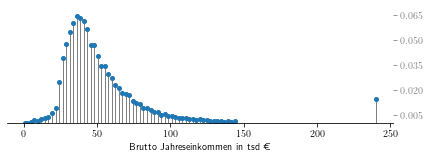

In [8]:
width = 250
size = set_size(width, subplots=(1, 1))
fig, ax = plt.subplots(1, 1, figsize=(size[0]*2,size[1]))
#B_frame_norich.plot('Mittelwert','Anteil', xlabel="Brutto Jahreseinkommen in €", ylabel="Anteil in \%", kind="scatter", xticks=(50, 2000, 5000, 10000))B_frame_norich.plot('Mittelwert','Anteil', xlabel="Brutto Jahreseinkommen in €", ylabel="Anteil in \%", kind="scatter", xticks=(50, 2000, 5000, 10000))
#plt.plot(B_frame_norich['Mittelwert'],B_frame_norich['Anteil'])
markerline, stemline, baseline, = plt.stem(B_frame['Mittelwert']/1000,B_frame['Anteil'])
#plt.scatter(B_frame['Mittelwert']/1000,B_frame['Anteil'], 7)

plt.setp(markerline, markersize=4)
plt.setp(stemline, lw=1, color="gray")
plt.setp(baseline, lw=0)

ax.set_ylim((0,0.07))
ax.set_yticks([0.005, 0.02, 0.035, 0.05, 0.065])
ax.spines.left.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_label_position("right")
ax.tick_params(axis='y', colors='gray')
ax.yaxis.tick_right()
#ax.grid(axis='y')

ax.set_xlabel("Brutto Jahreseinkommen in tsd €")
#ax.set_ylabel("Häufigkeit")
#ax.set_title("Brutto Einkommensverteilung in Deutschland im April 2023")
#plt.savefig("./fig/income-distribution-germany-2023.png",bbox_inches='tight', dpi=300)

In [7]:
Netto_ger = tg.netto_ger_vectorized(B_frame_norich['Mittelwert'])
Weights = B_frame_norich['Anteil']/100.0
Weights_normalized = Weights/np.sum(Weights)
print(np.sum(Weights_normalized))
Netto_ger_reformed = tg.netto_vectorized(B_frame_norich['Mittelwert'], 5)

1.0000000000000002


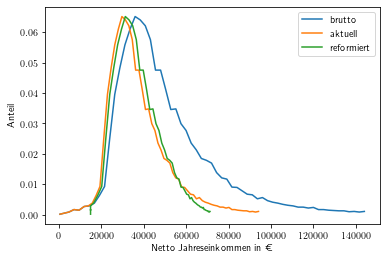

In [8]:
plt.plot(B_frame_norich['Mittelwert'], Weights_normalized, label="brutto")
plt.plot(Netto_ger, Weights_normalized, label="aktuell")
plt.plot(Netto_ger_reformed, Weights_normalized, label="reformiert")
plt.xlabel("Netto Jahreseinkommen in €")
plt.ylabel("Anteil")
plt.legend()

In [67]:
def compute_median_index_from_weights(weights):
    sum = 0
    for i in np.arange(len(weights)):
        sum += weights[i]
        if sum >= 0.5:
            return i

In [68]:
sum = 0
for i in np.arange(len(Weights_normalized)):
    sum += Weights_normalized[i]
    if sum >= 0.5:
        print(sum)
        median_index = i
        break

0.5080170489141467


In [69]:
median_netto_reformed = Netto_ger_reformed[median_index]
median_netto_ger = Netto_ger[median_index]
print("med(netto) before = ", median_netto_ger, "\n")
print("med(netto) reformed = ", median_netto_reformed)

med(netto) before =  34652.3925365025 

med(netto) reformed =  63591


### Tax Revenue

In [78]:
brutto_ger = B_frame['Mittelwert']

In [79]:
tax_reformed = tax_vectorized(brutto_ger, 5, 5)
tax_current = tg.tax_ger_vectorized(brutto_ger)

In [80]:
revenue_reformed = np.dot(tax_reformed, B_frame["Anteil"])
revenue_current = np.dot(tax_current, B_frame["Anteil"])

In [81]:
print(revenue_reformed, revenue_current)

15025.405931012541 12339.126411516201


In [251]:
delta_revenue = 27*1e6*(revenue_reformed-revenue_current)/1000000000 # extra revenue in mrd; assume 22 mio people working full time; chosen s.t. total revenue equals actual revenue reported

In [252]:
print("total tax revenue before reform is", 22*1e6*revenue_current/1e9, "mrd € per year")

total tax revenue before reform is 275.73742265335653 mrd € per year


In [253]:
print("Change in tax revenue is", delta_revenue, "mrd € per year")

Change in tax revenue is 79.73027878906252 mrd € per year


### Who gets more, who less?

In [9]:
Netto_ger_all = tg.netto_ger_vectorized(B_frame['Mittelwert'])
Netto_ger_reformed_all = tg.netto_vectorized(B_frame['Mittelwert'], 12.2, 10)
mass_function = np.array(B_frame["Anteil"])
Brutto_ger_all = np.array(B_frame["Mittelwert"]) # brutto_values

In [10]:
k = 8; alpha = 6.8; M = 24000;

In [11]:
tax_reformed = tg.tax_vectorized(Brutto_ger_all, alpha, k, M)
tax_current = tg.tax_ger_vectorized(Brutto_ger_all)

revenue1=np.dot(tax_reformed[:-1], mass_function[:-1])
revenue2=tax_reformed[-1]*mass_function[-1]
revenue_now1 = np.dot(tax_current[:-1],mass_function[:-1])
revenue_now2 = tax_current[-1]*mass_function[-1]

print(revenue_now1, revenue_now2, revenue1, revenue2, revenue2/(revenue1+revenue2)*100, mass_function[-1]*100)

11216.630309516204 1316.888902 1779.7489 1788.7482 50.12609369922144 1.46


### Quantile Contributions

In [12]:
quantiles = [0.2, 0.4, 0.6, 0.8, 1.0]
contribs = tg.quantile_contributions(mass_function, tax_reformed, quantiles)
print(mass_function)
print(tax_reformed)
print(np.array(contribs)*100)

[0.0001 0.0003 0.0008 0.0016 0.0014 0.0026 0.0028 0.0037 0.0062 0.0091
 0.0245 0.039  0.0476 0.0551 0.0602 0.0643 0.0632 0.0613 0.0568 0.0469
 0.0469 0.0406 0.0341 0.0343 0.0295 0.0273 0.0232 0.021  0.0182 0.0176
 0.0167 0.0136 0.0119 0.0115 0.0089 0.0088 0.0077 0.0066 0.0064 0.0051
 0.0055 0.0045 0.004  0.0037 0.0033 0.003  0.0028 0.0024 0.0024 0.0021
 0.0023 0.0016 0.0016 0.0014 0.0013 0.0012 0.0012 0.0009 0.001  0.0008
 0.001  0.0146]
[     0      0      0      0      0      0      0      0      0      0
      0   -286   -319   -337   -337   -317   -274   -206   -111     12
    167    354    576    835   1130   1464   1839   2254   2711   3211
   3754   4340   4971   5647   6367   7131   7941   8795   9693  10636
  11622  12652  13724  14839  15995  17192  18429  19706  21021  22374
  23764  25190  26651  28147  29676  31238  32831  34455  36109  37791
  39502 122517]
[-1.25843174 -1.6249782  -0.29529238  6.33195134 96.84675098]


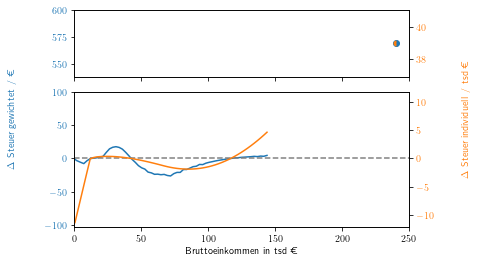

In [15]:
#deltaN = netto_vectorized(B,5,5)-tg.netto_ger_vectorized(B)
deltaN = -Netto_ger_reformed_all+Netto_ger_all

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, height_ratios=(1,2))
fig.subplots_adjust(hspace=0.15)  # adjust space between Axes

ax2.set_ylim(-50,100)
ax1.set_xlim(0,250)
#ax1.set_ylim(1200,1300)

# hide the spines between ax and ax2
#ax1.spines.bottom.set_visible(False)
#ax2.spines.top.set_visible(False)
#ax2.xaxis.tick_top()
ax2.tick_params(labeltop=False)  # don't put tick labels at the top
#ax1.xaxis.tick_bottom()

#plt.plot(B, deltaN, label="'Netto reformiert - Netto zuvor'")
#plt.plot(Brutto_ger_all, deltaN, label="'Netto reformiert - Netto zuvor'")
color1="tab:blue"
color2="tab:orange"

ax2.plot(Brutto_ger_all[:-1]/1000, deltaN[:-1]*mass_function[:-1], label="'Netto reformiert - Netto zuvor'")
ax1.scatter(Brutto_ger_all[-1]/1000, deltaN[-1]*mass_function[-1], label="'Netto reformiert - Netto zuvor'")


ax3 = ax2.twinx()
ax4 = ax1.twinx()
ax3.plot(Brutto_ger_all[:-1]/1000, deltaN[:-1]/1000, color="tab:orange")
ax4.plot(Brutto_ger_all[-1]/1000, deltaN[-1]/1000, color="tab:orange", fillstyle="left", marker="o", markeredgewidth=0)

ax2.tick_params(axis='y', labelcolor=color1)
ax3.tick_params(axis='y', labelcolor=color2)
ax1.tick_params(axis='y', labelcolor=color1)
ax4.tick_params(axis='y', labelcolor=color2)



def align_yaxis_np(ax1, ax2):
    """Align zeros of the two axes, zooming them out by same ratio"""
    axes = np.array([ax1, ax2])
    extrema = np.array([ax.get_ylim() for ax in axes])
    tops = extrema[:,1] / (extrema[:,1] - extrema[:,0])
    # Ensure that plots (intervals) are ordered bottom to top:
    if tops[0] > tops[1]:
        axes, extrema, tops = [a[::-1] for a in (axes, extrema, tops)]

    # How much would the plot overflow if we kept current zoom levels?
    tot_span = tops[1] + 1 - tops[0]

    extrema[0,1] = extrema[0,0] + tot_span * (extrema[0,1] - extrema[0,0])
    extrema[1,0] = extrema[1,1] + tot_span * (extrema[1,0] - extrema[1,1])
    [axes[i].set_ylim(*extrema[i]) for i in range(2)]

#plt.xlim((0,150000))
#plt.ylim((20000,-50000))
ax2.hlines(y=0, xmin=0, xmax=250000, ls='--', color='gray')
plt.xlabel("Brutto Jahreseinkommen")

align_yaxis_np(ax2, ax3)
#align_yaxis_np(ax1, ax4)
ax2.set_xlabel("Bruttoeinkommen in tsd €")
fig.text(1.02, 0.5, r"$\Delta$ Steuer individuell / tsd €", va='center', rotation='vertical', color=color2)
fig.text(-0.03, 0.5, r"$\Delta$ Steuer gewichtet / €", va='center', rotation='vertical', color=color1)

plt.show()


#plt.legend()
#plt.yscale('log')

In [89]:
diff_netto = netto_vectorized(brutto_ger, 5.0)-tg.netto_ger_vectorized(brutto_ger)
who_has_more = (diff_netto > 0)

In [ ]:
fraction_more_after = np.dot(who_has_more, B_frame["Anteil"])
print(fraction_more_after*100, "% have more after the reform" )

54.47 % have more after the reform


: 

: 

The above fraction of people has more after!

### Gini Index

In [25]:
Netto_ger_all = tg.netto_ger_vectorized(B_frame['Mittelwert'])
Netto_ger_reformed_all = netto_vectorized(B_frame['Mittelwert'], 5)
mass_function = B_frame["Anteil"]
Brutto_ger_all = B_frame["Mittelwert"] # brutto_values

In [23]:
G_brutto = Gini(Brutto_ger_all, mass_function)
G_netto_current = Gini(Netto_ger_all, mass_function)
G_netto_reformed = Gini(Netto_ger_reformed_all, mass_function)

In [49]:
print("Gini index brutto Germany:", G_brutto)
print("Gini index netto current Germany:", G_netto_current)
print("Gini index netto reformed Germany:", G_netto_reformed)

Gini index brutto Germany: 0.25999580222068064
Gini index netto current Germany: 0.2135743375510329
Gini index netto reformed Germany: 0.17377035669199586


Offizielle Daten für die äquivalenzgewichteten Haushaltsnettoeinkommen bei ca. 0.3. Erscheint plausibel, dass die Ungleichheit auf Haushalte bezogen noch einmal höher ist.

### Überblickstabelle

In [27]:
# define parameter set
alpha_k_array = [(5,5),(4,5),(12,10)]
#alpha_k_array = [(5,5),(7,5),(10,10)]

In [28]:
table = pd.DataFrame(columns=['alpha','k','gini','revenue','whohasmore','median'])

In [44]:
brutto = B_frame['Mittelwert']
mass = B_frame["Anteil"]
netto_now = tg.netto_ger_vectorized(brutto)
tax_now = tg.tax_ger_vectorized(brutto)
revenue_now = np.dot(tax_now, mass)

gini_now = Gini(netto_now, mass)

print("gini now = ", "%0.2f" % gini_now, "\n")

median_index = compute_median_index_from_weights(mass)

for (alpha, k) in alpha_k_array:
    print("alpha =", alpha,"|",  "k =", k)

    netto_dist = netto_vectorized(brutto, alpha, k)

    diff_netto = netto_dist-netto_now
    who_has_more = (diff_netto > 0)
    fraction_more_after = np.dot(who_has_more, mass)

    gini = Gini(netto_dist, mass)

    revenue = reformed_tax_revenue(brutto, mass, alpha, k)

    print("gini=","%0.2f" % (gini))
    print("delta revenue=","%0.2f" % ((revenue-revenue_now)/revenue_now))
    print("delta median=","%0.2f" % ((netto_dist[median_index]-netto_now[median_index])/netto_now[median_index]))
    print("more = ", "%0.2f" % fraction_more_after, "\n")

gini now =  0.22 

alpha = 5 | k = 5
gini= 0.16
delta revenue= 0.24
delta median= 0.01
more =  0.54 

alpha = 4 | k = 5
gini= 0.15
delta revenue= -0.07
delta median= 0.14
more =  0.86 

alpha = 12 | k = 10
gini= 0.21
delta revenue= -0.01
delta median= 0.01
more =  0.73 



In [ ]:
enue(brutto, mass, alpha, k)

    print("gini=","%0.2f" % (gini))
    print("delta revenue=","%0.2f" % ((revenue-revenue_now)/revenue_now))
    print("delta median=","%0.2f" % ((netto_dist[median_index]-netto_now[median_index])/netto_now[median_index]))
    print("more = ", "%0.2f" % fraction_more_after, "\n")

### Variante der Linken

Text(0.05, 0.85, '(b)')

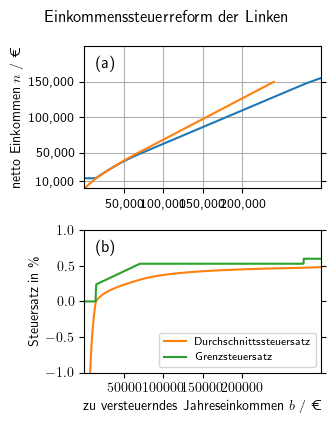

In [30]:
width = 500
size = set_size(width, subplots=(2, 1))
fig, [ax1,ax2] = plt.subplots(2, 1, figsize=(0.5*size[0], size[1]), sharex=False)

plt.suptitle("Einkommenssteuerreform der Linken")

ax1.plot(B, tg.netto_linke_vectorized(B))
ax1.plot(brutto, netto_now)
#ax1.plot(B, netto_vectorized(B, alpha=20), "-.", c="gray")
#ax1.plot(B, netto_vectorized(B, alpha=5))

#ax1.grid()
#ax2.grid()

ax1.set_xlim(0, 300000)
ax1.set_ylim(0, 200000)

#ax1.set_title(r"$n = 1.000 \left[1+4 \tanh \left(\frac{b - 1.000}{5 \cdot 1.000} \right) \right]$")

ax1.set_yticks([10e3,50e3,100e3,150e3])
ax1.set_xticks([50e3,100e3,150e3,200e3])
ax2.set_xticks([50e3,100e3,150e3,200e3])

current_values = ax1.get_yticks();
ax1.yaxis.set_major_locator(mticker.FixedLocator(current_values))
ax1.set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);
current_values = ax1.get_xticks();
ax1.xaxis.set_major_locator(mticker.FixedLocator(current_values))
ax1.set_xticklabels(['{:,.0f}'.format(x) for x in current_values]);
#ax1.legend()
#ax1.set_yticklabels((10000,20000))

ax1.grid()

#ax1.set_xlabel(r"Jahreseinkommen $b$")
ax1.set_ylabel(r"netto Einkommen $n$ / \texteuro%1.0fB") 
ax1.text(0.05,0.85,r"(a)", transform=ax1.transAxes, fontsize=12, color="black")

ax2.plot(B, tg.tax_linke_vectorized(B)/B, label="Durchschnittssteuersatz", c="tab:orange")
ax2.plot(B, tg.grenz_linke_vectorized(B), label="Grenzsteuersatz", c="tab:green")


ax2.set_xlim(0, 300000)
ax2.set_ylim(-1, 1)

#ax1.set_title("Steuertarif für ein Maximaleinkommen")

#current_values = ax2.get_yticks();
#ax2.yaxis.set_major_locator(mticker.FixedLocator(current_values))
#ax2.set_yticklabels(['{:,.0%}'.format(x) for x in current_values]);
#current_values = plt.gca().get_xticks();
#ax2.xaxis.set_major_locator(mticker.FixedLocator(current_values))
#ax2.set_xticklabels(['{:,.0f}'.format(x) for x in current_values]);

ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')

ax2.legend(fontsize=8)

ax2.set_xlabel(r"zu versteuerndes Jahreseinkommen $b$ / \texteuro%1.0fB")
ax2.set_ylabel("Steuersatz in \%")

fig.tight_layout()

ax2.text(0.05,0.85,r"(b)", transform=ax2.transAxes, fontsize=12, color="black")

#plt.avefig("./fig/status-quo.png",bbox_inches='tight', dpi=300)

In [34]:
brutto = B_frame['Mittelwert']
mass = B_frame["Anteil"]
netto_now = tg.netto_ger_vectorized(brutto)
tax_now = tg.tax_ger_vectorized(brutto)
revenue_now = np.dot(tax_now, mass)

gini_now = Gini(netto_now, mass)

#print("gini now = ", "%0.2f" % gini_now, "\n")

median_index = compute_median_index_from_weights(mass)

netto_dist = tg.netto_linke_vectorized(brutto)

diff_netto = netto_dist-netto_now
who_has_more = (diff_netto > 0)
fraction_more_after = np.dot(who_has_more, mass)

gini = Gini(netto_dist, mass)

tax_linke = tg.tax_linke_vectorized(brutto)
revenue_linke = np.dot(tax_linke, mass)

print("gini=","%0.2f" % (gini))
print("delta revenue=","%0.2f" % ((revenue_linke-revenue_now)/revenue_now))
print("delta median=","%0.2f" % ((netto_dist[median_index]-netto_now[median_index])/netto_now[median_index]))
print("more = ", "%0.2f" % fraction_more_after, "\n")

gini= 0.20
delta revenue= 0.11
delta median= -0.01
more =  0.26 



: 